In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Summary statistics of numerical columns
data = pd.read_csv("SampleSuperstore.csv")
summary_stats = data.describe()
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


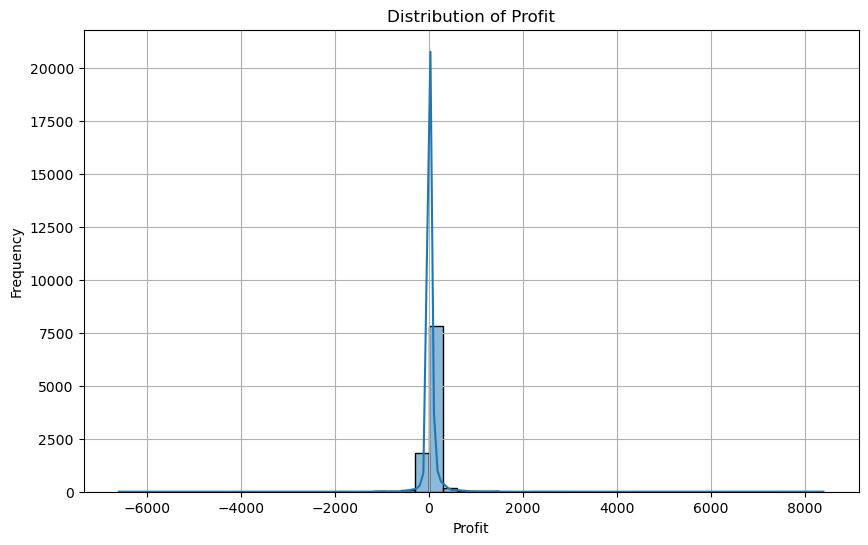

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit'], bins=50, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

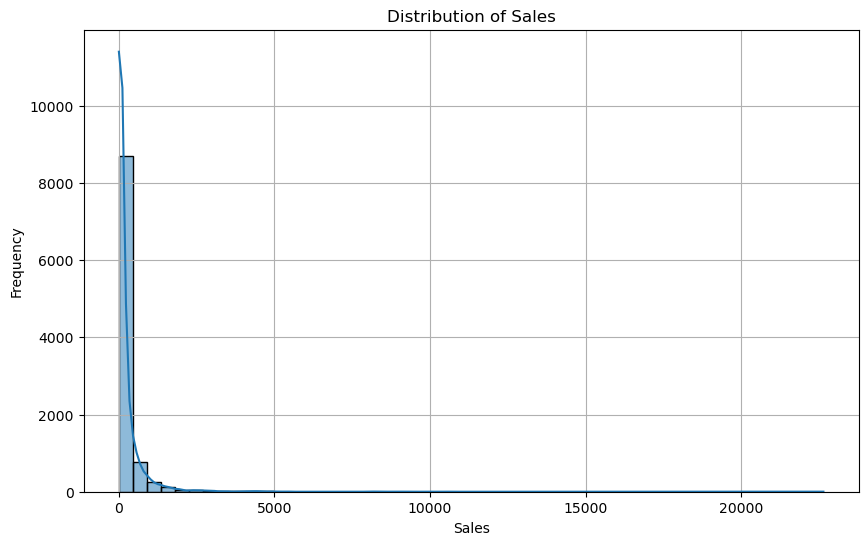

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Numeric Columns:  Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')
Correlation Matrix:
              Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


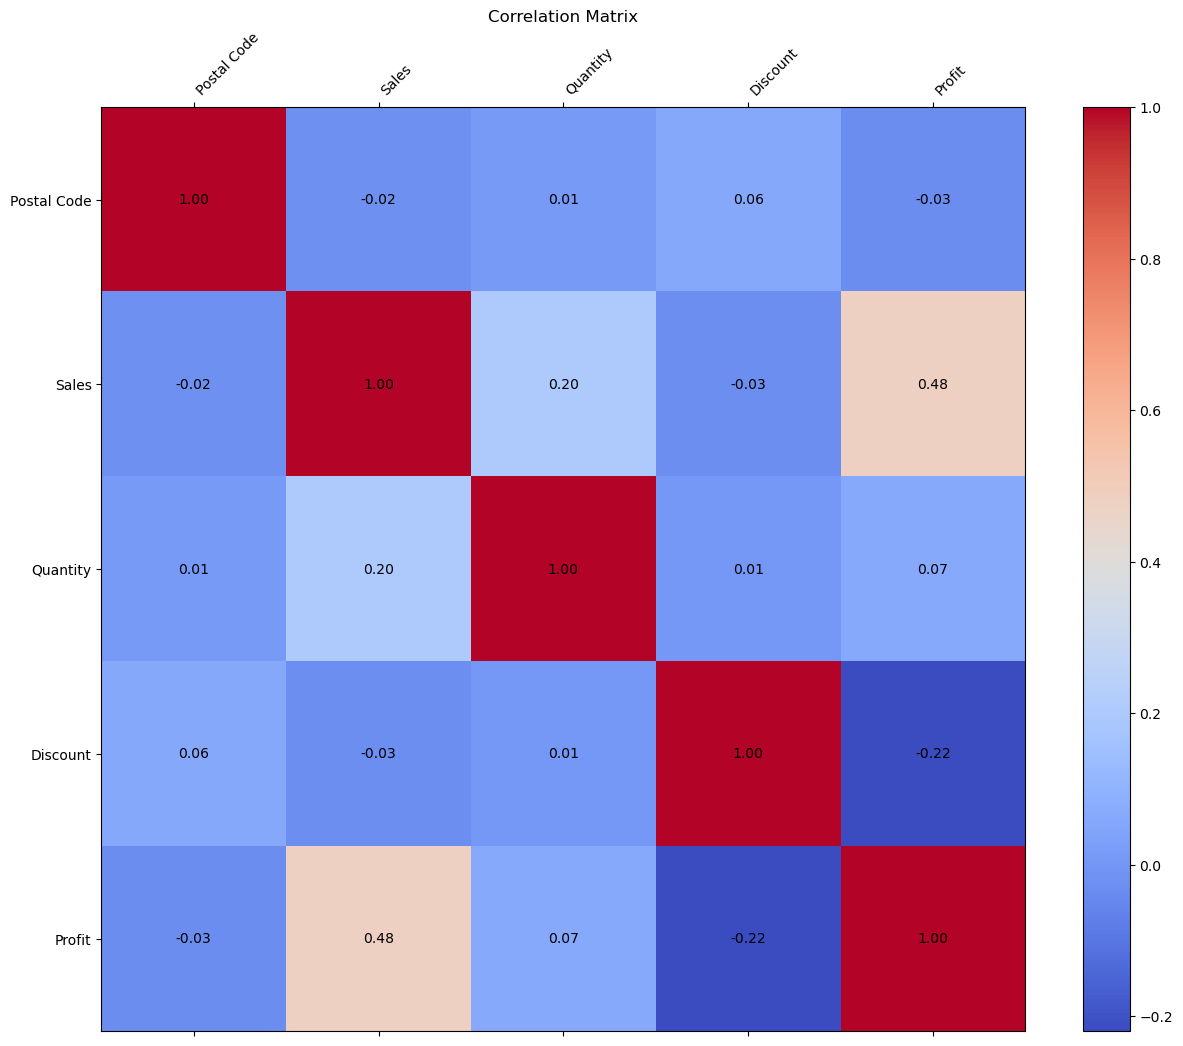

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for illustration purposes
# Replace this with your actual DataFrame
# data = pd.read_csv('your_data.csv')

# Ensure data has numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Numeric Columns: ", numeric_columns)

# Check if numeric_columns is not empty
if numeric_columns.empty:
    raise ValueError("No numeric columns found in the dataset")

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Ensure correlation_matrix is not empty
if correlation_matrix.empty:
    raise ValueError("Correlation matrix is empty")

# Plot the correlation matrix using Matplotlib
fig, ax = plt.subplots(figsize=(15, 12))  # Increase the figure size for better visibility

cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Set up ticks
ax.set_xticks(np.arange(len(numeric_columns)))
ax.set_yticks(np.arange(len(numeric_columns)))

# Label them with the column names
ax.set_xticklabels(numeric_columns, rotation=45, ha='left')
ax.set_yticklabels(numeric_columns)

# Annotate each cell with the correlation value
for i in range(len(numeric_columns)):
    for j in range(len(numeric_columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()


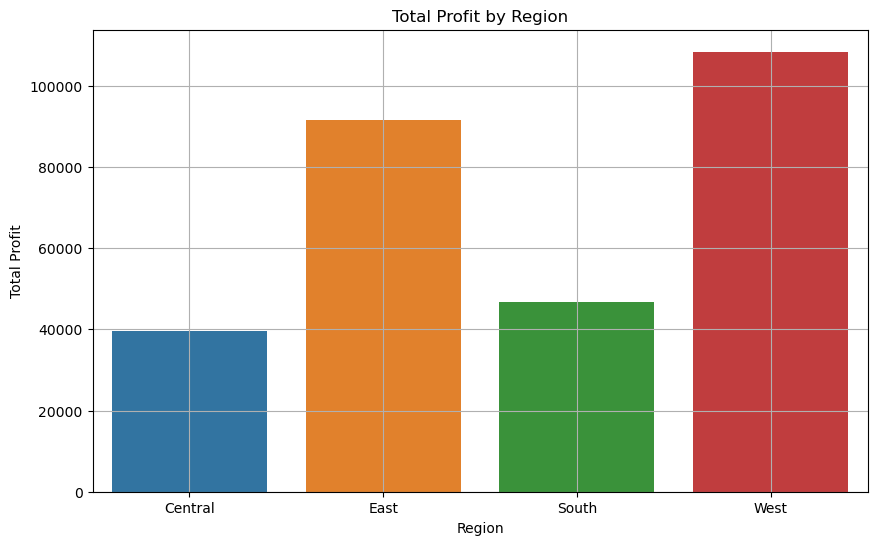

In [45]:
# Profit by Region
profit_by_region = data.groupby('Region')['Profit'].sum().reset_index()

# Profit by Category
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

# Profit by Sub-Category
profit_by_sub_category = data.groupby('Sub-Category')['Profit'].sum().reset_index()

# Transactions with high discounts and low profits
high_discount_low_profit = data[(data['Discount'] > 0.5) & (data['Profit'] < 0)]

# Plotting Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=profit_by_region)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()




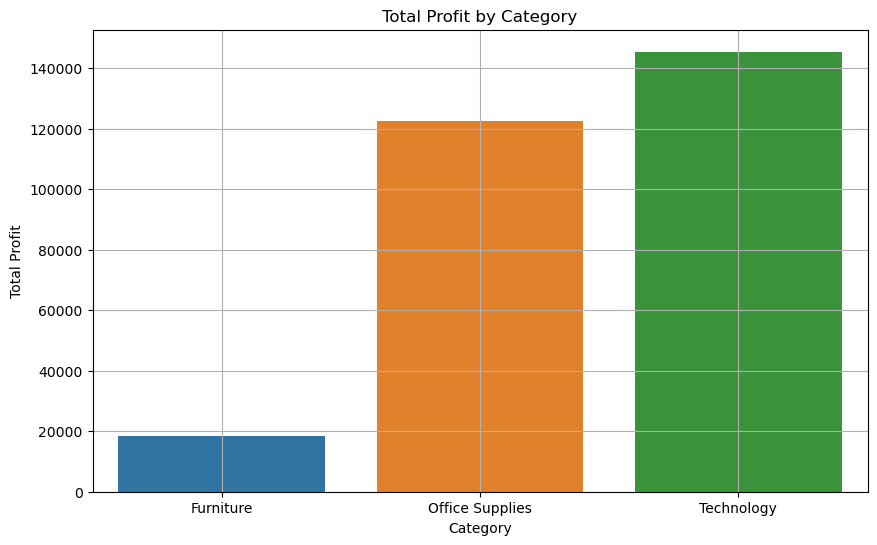

In [38]:
# Plotting Profit by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=profit_by_category)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()



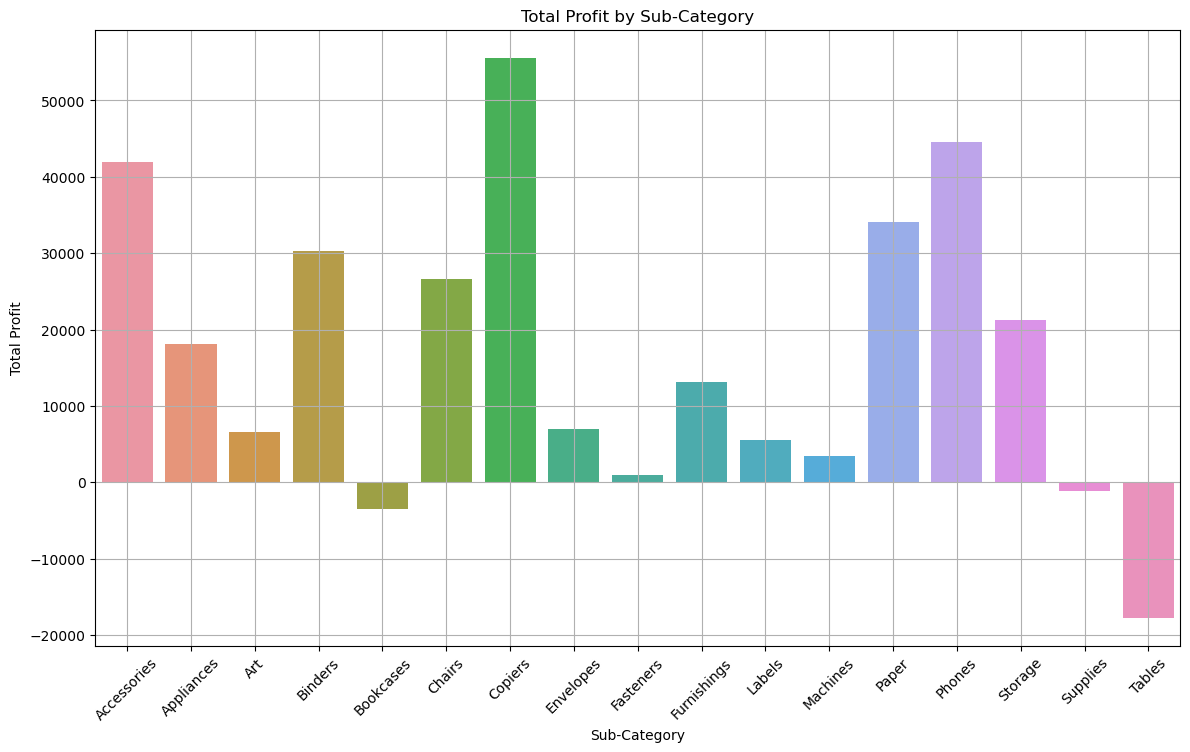

(    Region       Profit
 0  Central   39706.3625
 1     East   91522.7800
 2    South   46749.4303
 3     West  108418.4489,
           Category       Profit
 0        Furniture   18451.2728
 1  Office Supplies  122490.8008
 2       Technology  145454.9481,
    Sub-Category      Profit
 0   Accessories  41936.6357
 1    Appliances  18138.0054
 2           Art   6527.7870
 3       Binders  30221.7633
 4     Bookcases  -3472.5560
 5        Chairs  26590.1663
 6       Copiers  55617.8249
 7     Envelopes   6964.1767
 8     Fasteners    949.5182
 9   Furnishings  13059.1436
 10       Labels   5546.2540
 11     Machines   3384.7569
 12        Paper  34053.5693
 13       Phones  44515.7306
 14      Storage  21278.8264
 15     Supplies  -1189.0995
 16       Tables -17725.4811,
         Postal Code        Sales    Quantity    Discount       Profit
 count    856.000000   856.000000  856.000000  856.000000   856.000000
 mean   57897.112150    75.033572    3.912383    0.718925   -89.438144
 std 

In [39]:
# Plotting Profit by Sub-Category
plt.figure(figsize=(14, 8))
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_sub_category)
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Display high discount low profit transactions
high_discount_low_profit_summary = high_discount_low_profit.describe()

profit_by_region, profit_by_category, profit_by_sub_category, high_discount_low_profit_summary